In [91]:
import matplotlib.pyplot as plt
plt.style.use(['ggplot', 'seaborn-whitegrid'])

In [89]:
plt.style.available

['seaborn-bright',
 'fivethirtyeight',
 'grayscale',
 'seaborn-dark',
 'seaborn-white',
 'ggplot',
 'bmh',
 'seaborn-whitegrid',
 'dark_background',
 'seaborn-notebook',
 'seaborn-deep',
 'seaborn-ticks',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-darkgrid',
 'classic',
 'seaborn-dark-palette',
 'seaborn-colorblind',
 'seaborn-talk',
 'seaborn-muted',
 'seaborn-poster']

In [19]:
#run this if you want to change excel sheet
writer = pd.ExcelWriter('mediacloud.xlsx')
harveydf.to_excel(writer,'Harvey')
irmadf.to_excel(writer, 'Irma')
mariadf.to_excel(writer, 'Maria')
totaldf.to_excel(writer, 'Total')
writer.save()

In [1]:
import mediacloud
import json
import datetime
import nltk
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.corpus import stopwords
import string
mc = mediacloud.api.MediaCloud('c8bf5d3fcd7298b3d4bbe5f7af7b9d6d56a984cf2788ae9738d998c5342d6e2e')

#harvey
fetch_size = 1000
stories = []
last_processed_stories_id = 0
while len(stories) < 10000:
    fetched_stories = mc.storyList('( hurricane AND harvey )', 
                                   solr_filter=[ mc.publish_date_query( datetime.date(2017,8,23), datetime.date(2017,10,2)), 
                                                                         'tags_id_media:1'],
                                    last_processed_stories_id=last_processed_stories_id, rows= fetch_size)
    stories.extend( fetched_stories)
    if len( fetched_stories) < fetch_size:
        break
    
    last_processed_stories_id = stories[-1]['processed_stories_id']
    
jason=json.dumps(stories)
harveyarticles=json.loads(jason)

In [2]:
harveytitles=[(article['title'], article['media_name'], article['publish_date']) for article in harveyarticles]

In [3]:
import pandas as pd
harveydf=pd.DataFrame(harveytitles)
harveydf.columns=['Headline','Source', 'Date']

In [4]:
#irma
fetch_size = 1000
stories = []
last_processed_stories_id = 0
while len(stories) < 10000:
    fetched_stories = mc.storyList('( hurricane AND irma )', 
                                   solr_filter=[ mc.publish_date_query( datetime.date(2017,8,23), datetime.date(2017,10,2)), 
                                                                         'tags_id_media:1'],
                                    last_processed_stories_id=last_processed_stories_id, rows= fetch_size)
    stories.extend( fetched_stories)
    if len( fetched_stories) < fetch_size:
        break
    
    last_processed_stories_id = stories[-1]['processed_stories_id']
    
jason=json.dumps(stories)
irmaarticles=json.loads(jason)

In [5]:
irmatitles=[(article['title'], article['media_name'], article['publish_date']) for article in irmaarticles]

In [6]:
irmadf=pd.DataFrame(irmatitles)
irmadf.columns=['Headline','Source', 'Date']

In [7]:
#maria
fetch_size = 1000
stories = []
last_processed_stories_id = 0
while len(stories) < 10000:
    fetched_stories = mc.storyList('( hurricane AND maria )', 
                                   solr_filter=[ mc.publish_date_query( datetime.date(2017,8,23), datetime.date(2017,10,2)), 
                                                                         'tags_id_media:1'],
                                    last_processed_stories_id=last_processed_stories_id, rows= fetch_size)
    stories.extend( fetched_stories)
    if len( fetched_stories) < fetch_size:
        break
    
    last_processed_stories_id = stories[-1]['processed_stories_id']
    
jason=json.dumps(stories)
mariaarticles=json.loads(jason)

In [8]:
mariatitles=[(article['title'], article['media_name'], article['publish_date']) for article in mariaarticles]

In [9]:
mariadf=pd.DataFrame(mariatitles)
mariadf.columns=['Headline','Source', 'Date']

In [10]:
totaldf=pd.concat([harveydf, irmadf, mariadf])
totaldf.drop_duplicates('Headline', inplace=True)
totaldf=totaldf.sort_values(by='Date')

In [11]:
alltitles=[i for i in totaldf['Headline']]

In [12]:
wordlist=[]
for headline in alltitles:
    wordlist.append(word_tokenize(headline))

In [13]:
wordsupper=[item for sublist in wordlist for item in sublist]
words=[word.lower() for word in wordsupper]
punctuation = list(string.punctuation)
random=['hurricane', 'harvey', 'irma', 'jose', 'maria']
stops=set(stopwords.words('english')+punctuation+random)

In [14]:
def find_bigrams(words):
  bigram_list = []
  for i in range(len(words)-1):
      bigram_list.append((words[i], words[i+1]))
  return bigram_list
bigrams=find_bigrams(words)

In [15]:
harvey_bigrams=pd.DataFrame([b for b in bigrams if (b[0] == 'harvey') and (b[1] not in stops)])
irma_bigrams=pd.DataFrame([b for b in bigrams if (b[0]=='irma') and b[1] not in stops])
maria_bigrams=pd.DataFrame([b for b in bigrams if (b[0]=='maria') and b[1] not in stops])

In [130]:
total_bigrams=pd.concat([harvey_bigrams, irma_bigrams, maria_bigrams])

In [17]:
writer = pd.ExcelWriter('mcbigrams.xlsx')
total_bigrams.to_excel(writer, 'Bigrams')
writer.save()

In [44]:
mentions=pd.read_excel('/Users/anna/Desktop/PRISMOJI/mediacloud.xlsx', 
                     sheetname="mentions")
mentions=pd.DataFrame(mentions)
mentions["Date"] = pd.to_datetime(mentions["Date"])
mentions["Date"]=mentions["Date"].dt.strftime('%m/%d')
contingency= pd.crosstab(mentions["Date"], mentions["Hurricane"])

In [46]:
contingency

Hurricane,harvey,irma,maria
Date,,,
08/23,49,0,0
08/24,205,0,0
08/25,511,0,0
08/26,427,0,0
08/27,424,0,0
08/28,825,3,0
08/29,800,0,0
08/30,801,29,0
08/31,581,31,0


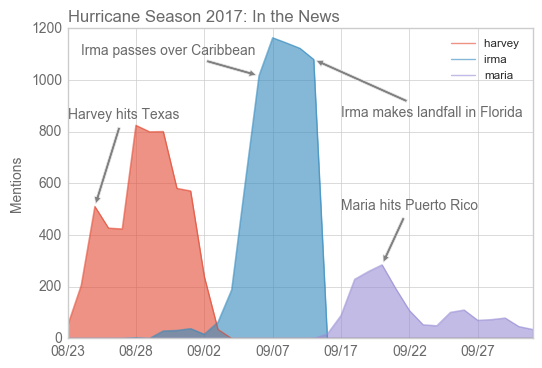

In [110]:
contingency.plot.area(alpha=0.6, stacked=False)
plt.title('Hurricane Season 2017: In the News', loc='left', fontsize=12, color="dimgray")
plt.ylabel("Mentions", fontsize=10, color="dimgray")
plt.tick_params(axis="y", labelcolor="dimgrey")
plt.xlabel("")
plt.tick_params(axis="x", labelcolor="dimgrey")
arrow_properties = dict(facecolor="grey", arrowstyle='simple')
plt.annotate('Harvey hits Texas', xy=(2,511), xytext=(0,850),
            arrowprops=arrow_properties, fontsize=10, color="dimgray")
plt.annotate('Irma passes over Caribbean', xy=(14,1017), xytext=(1, 1100),
            arrowprops=arrow_properties, fontsize=10, color="dimgray")
plt.annotate('Irma makes landfall in Florida', xy=(18,1080), xytext=(20,860),
            arrowprops=arrow_properties, fontsize=10, color="dimgray")
plt.annotate('Maria hits Puerto Rico', xy=(23,285), xytext=(20, 500),
            arrowprops=arrow_properties, fontsize=10, color="dimgray")
plt.legend(title=None, fontsize='small')
plt.show()

In [186]:
hbigrams=pd.read_excel('/Users/anna/Desktop/PRISMOJI/mcbigrams.xlsx', 
                     sheetname="Harvey")
hbigrams=pd.DataFrame(hbigrams)
hcounts=hbigrams['Verb'].value_counts()
hcountsdf=pd.DataFrame(hcounts[:10]).reset_index()
hcountsdf.columns=(['verb', 'count'])
hcountsdf

,verb,count
0,strengthens,32
1,hits,16
2,slams,15
3,nears,14
4,makes,13
5,floods,10
6,forces,10
7,approaches,9
8,intensifies,8
9,regains,8


In [183]:
ibigrams=pd.read_excel('/Users/anna/Desktop/PRISMOJI/mcbigrams.xlsx', 
                     sheetname="Irma")
ibigrams=pd.DataFrame(ibigrams)
icountsdf=pd.DataFrame(icounts[:10]).reset_index()
icountsdf.columns=(['verb', 'count'])
icountsdf

,verb,count
0,strengthens,48
1,approaches,26
2,looms,16
3,makes,15
4,slams,15
5,forms,14
6,nears,13
7,hits,13
8,bears,10
9,heads,9


In [178]:
mbigrams=pd.read_excel('/Users/anna/Desktop/PRISMOJI/mcbigrams.xlsx', 
                     sheetname="Maria")
mbigrams=pd.DataFrame(mbigrams)
mcounts=mbigrams['Verb'].value_counts()
mcountsdf=pd.DataFrame(mcounts[:10]).reset_index()
mcountsdf.columns=(['verb', 'count'])
mcountsdf

,verb,count
0,grows,21
1,makes,18
2,hits,17
3,strengthens,13
4,weakens,12
5,lashes,11
6,slams,11
7,heads,10
8,becomes,9
9,churns,9


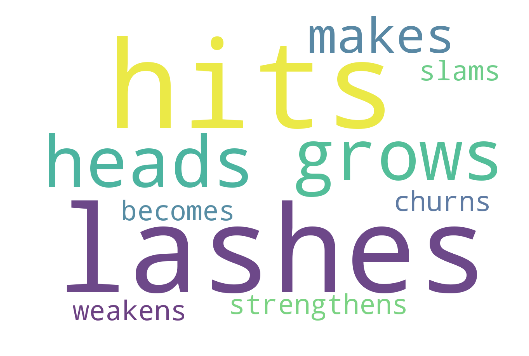

In [194]:
mariacloud = WordCloud(background_color='white',width=1200,
                  height=800).generate(" ".join(mcountsdf['verb'].values))
plt.imshow(mariacloud, alpha=0.8)
plt.axis('off')
plt.show()

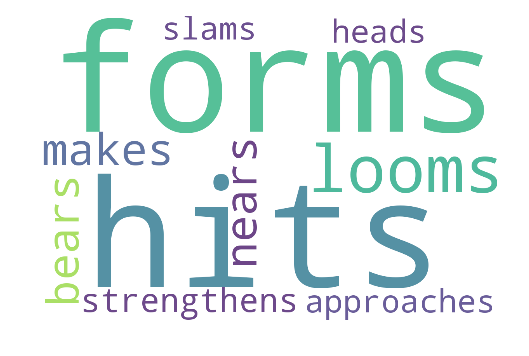

In [195]:
irmacloud = WordCloud(background_color='white',width=1200,
                  height=800).generate(" ".join(icountsdf['verb'].values))
plt.imshow(irmacloud, alpha=0.8)
plt.axis('off')
plt.show()